In [ ]:

# ## Projet - IA2 AP_DS 2025/2026

# ## Moussaoui DOUAA ET BENNOUI YOUSRA

# ## Groupe 1


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import generate_random_sales
import os

# Configuration pour l'affichage
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

In [17]:
# ## 1. Génération des Données
# Création des dates mensuelles
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

# Génération des ventes pour chaque produit
product_a_sales = generate_random_sales(50, 100, 12)
product_b_sales = generate_random_sales(30, 80, 12)
product_c_sales = generate_random_sales(20, 60, 12)
product_d_sales = generate_random_sales(10, 50, 12)

# Création du DataFrame initial
df_initial = pd.DataFrame({
    'Date': dates,
    'Product_A': product_a_sales,
    'Product_B': product_b_sales,
    'Product_C': product_c_sales,
    'Product_D': product_d_sales
})

# Sauvegarde du fichier initial
os.makedirs('data', exist_ok=True)
df_initial.to_csv('data/initial.csv', index=False)

print("DataFrame initial créé et sauvegardé:")
print(df_initial.head())

DataFrame initial créé et sauvegardé:
        Date  Product_A  Product_B  Product_C  Product_D
0 2025-01-01         96         37         21         25
1 2025-02-01         60         66         35         25
2 2025-03-01         58         62         60         27
3 2025-04-01         90         33         31         26
4 2025-05-01         92         50         32         45


In [18]:
# ## 2. Construction du DataFrame avec Métriques
# Copie du DataFrame pour les calculs
df_final = df_initial.copy()

# Renommer la colonne Date en Month
df_final['Month'] = df_final['Date'].dt.strftime('%Y-%m')
df_final = df_final.drop('Date', axis=1)

# Réorganiser les colonnes
cols = ['Month'] + [col for col in df_final.columns if col != 'Month']
df_final = df_final[cols]

# Calcul des métriques mensuelles
df_final['Total_Sales'] = df_final[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)
df_final['Average_Sales'] = df_final[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)
df_final['Month_over_Month_Growth'] = df_final['Total_Sales'].pct_change() * 100

# Attribution des trimestres
def get_quarter(month_str):
    month = int(month_str.split('-')[1])
    if month <= 3:
        return 'Q1'
    elif month <= 6:
        return 'Q2'
    elif month <= 9:
        return 'Q3'
    else:
        return 'Q4'

df_final['Quarter'] = df_final['Month'].apply(get_quarter)

# Produits avec ventes max et min par mois
product_columns = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
df_final['Max_Sales_Product'] = df_final[product_columns].idxmax(axis=1)
df_final['Min_Sales_Product'] = df_final[product_columns].idxmin(axis=1)

# Sauvegarde du DataFrame final
df_final.to_csv('data/final.csv', index=False)

print("DataFrame final avec métriques:")
print(df_final.head())

DataFrame final avec métriques:
     Month  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0  2025-01         96         37         21         25          179   
1  2025-02         60         66         35         25          186   
2  2025-03         58         62         60         27          207   
3  2025-04         90         33         31         26          180   
4  2025-05         92         50         32         45          219   

   Average_Sales  Month_over_Month_Growth Quarter Max_Sales_Product  \
0          44.75                      NaN      Q1         Product_A   
1          46.50                     3.91      Q1         Product_B   
2          51.75                    11.29      Q1         Product_B   
3          45.00                   -13.04      Q2         Product_A   
4          54.75                    21.67      Q2         Product_A   

  Min_Sales_Product  
0         Product_C  
1         Product_D  
2         Product_D  
3         Product_D  
4   

In [19]:
# ## 3. Tables Pivot et Résumés
# Préparation des données pour les tables pivot
df_pivot = df_final.melt(id_vars=['Month', 'Quarter'], 
                         value_vars=product_columns,
                         var_name='Product', 
                         value_name='Sales')

# Table pivot: moyenne des ventes par trimestre et produit
pivot_avg = pd.pivot_table(df_pivot, 
                          values='Sales', 
                          index='Quarter', 
                          columns='Product', 
                          aggfunc='mean')

# Table pivot: ventes totales par trimestre
pivot_total = pd.pivot_table(df_pivot, 
                            values='Sales', 
                            index='Quarter', 
                            columns='Product', 
                            aggfunc='sum')

# Ventes totales par trimestre (tous produits confondus)
quarterly_totals = df_final.groupby('Quarter')['Total_Sales'].sum()

# Création d'un DataFrame de sortie complet
output_data = {
    'Average_Sales_Per_Quarter': pivot_avg,
    'Total_Sales_Per_Quarter': pivot_total,
    'Quarterly_Total_Sales': quarterly_totals
}

# Sauvegarde des résultats
with open('data/output.csv', 'w') as f:
    f.write("AVERAGE SALES PER QUARTER\n")
    pivot_avg.to_csv(f)
    f.write("\n\nTOTAL SALES PER QUARTER\n")
    pivot_total.to_csv(f)
    f.write("\n\nQUARTERLY TOTAL SALES (ALL PRODUCTS)\n")
    quarterly_totals.to_csv(f)

print("Tables pivot créées:")
print("\nMoyenne des ventes par trimestre:")
print(pivot_avg)
print("\nVentes totales par trimestre:")
print(pivot_total)

Tables pivot créées:

Moyenne des ventes par trimestre:
Product  Product_A  Product_B  Product_C  Product_D
Quarter                                            
Q1           71.33      55.00      38.67      25.67
Q2           82.00      38.33      38.67      34.67
Q3           78.00      60.00      44.67      28.00
Q4           63.67      51.33      38.00      34.67

Ventes totales par trimestre:
Product  Product_A  Product_B  Product_C  Product_D
Quarter                                            
Q1             214        165        116         77
Q2             246        115        116        104
Q3             234        180        134         84
Q4             191        154        114        104


In [20]:
# ## 4. Insights Clés
# Meilleur mois (ventes totales les plus élevées)
best_month = df_final.loc[df_final['Total_Sales'].idxmax()]
print(f" MEILLEUR MOIS: {best_month['Month']}")
print(f"   Ventes totales: {best_month['Total_Sales']}")
print(f"   Produit le plus vendu: {best_month['Max_Sales_Product']}")

# Meilleur produit (ventes annuelles cumulées)
annual_sales = df_final[product_columns].sum()
best_product = annual_sales.idxmax()
print(f"\n MEILLEUR PRODUIT: {best_product}")
print(f"   Ventes annuelles: {annual_sales[best_product]}")

# Meilleur trimestre
best_quarter = quarterly_totals.idxmax()
print(f"\n MEILLEUR TRIMESTRE: {best_quarter}")
print(f"   Ventes du trimestre: {quarterly_totals[best_quarter]}")

# Résumé des performances
print(f"\n CROISSANCE ANNUELLE: {df_final['Month_over_Month_Growth'].mean():.2f}% (moyenne mensuelle)")

 MEILLEUR MOIS: 2025-09
   Ventes totales: 236
   Produit le plus vendu: Product_A

 MEILLEUR PRODUIT: Product_A
   Ventes annuelles: 885

 MEILLEUR TRIMESTRE: Q3
   Ventes du trimestre: 632

 CROISSANCE ANNUELLE: 2.36% (moyenne mensuelle)


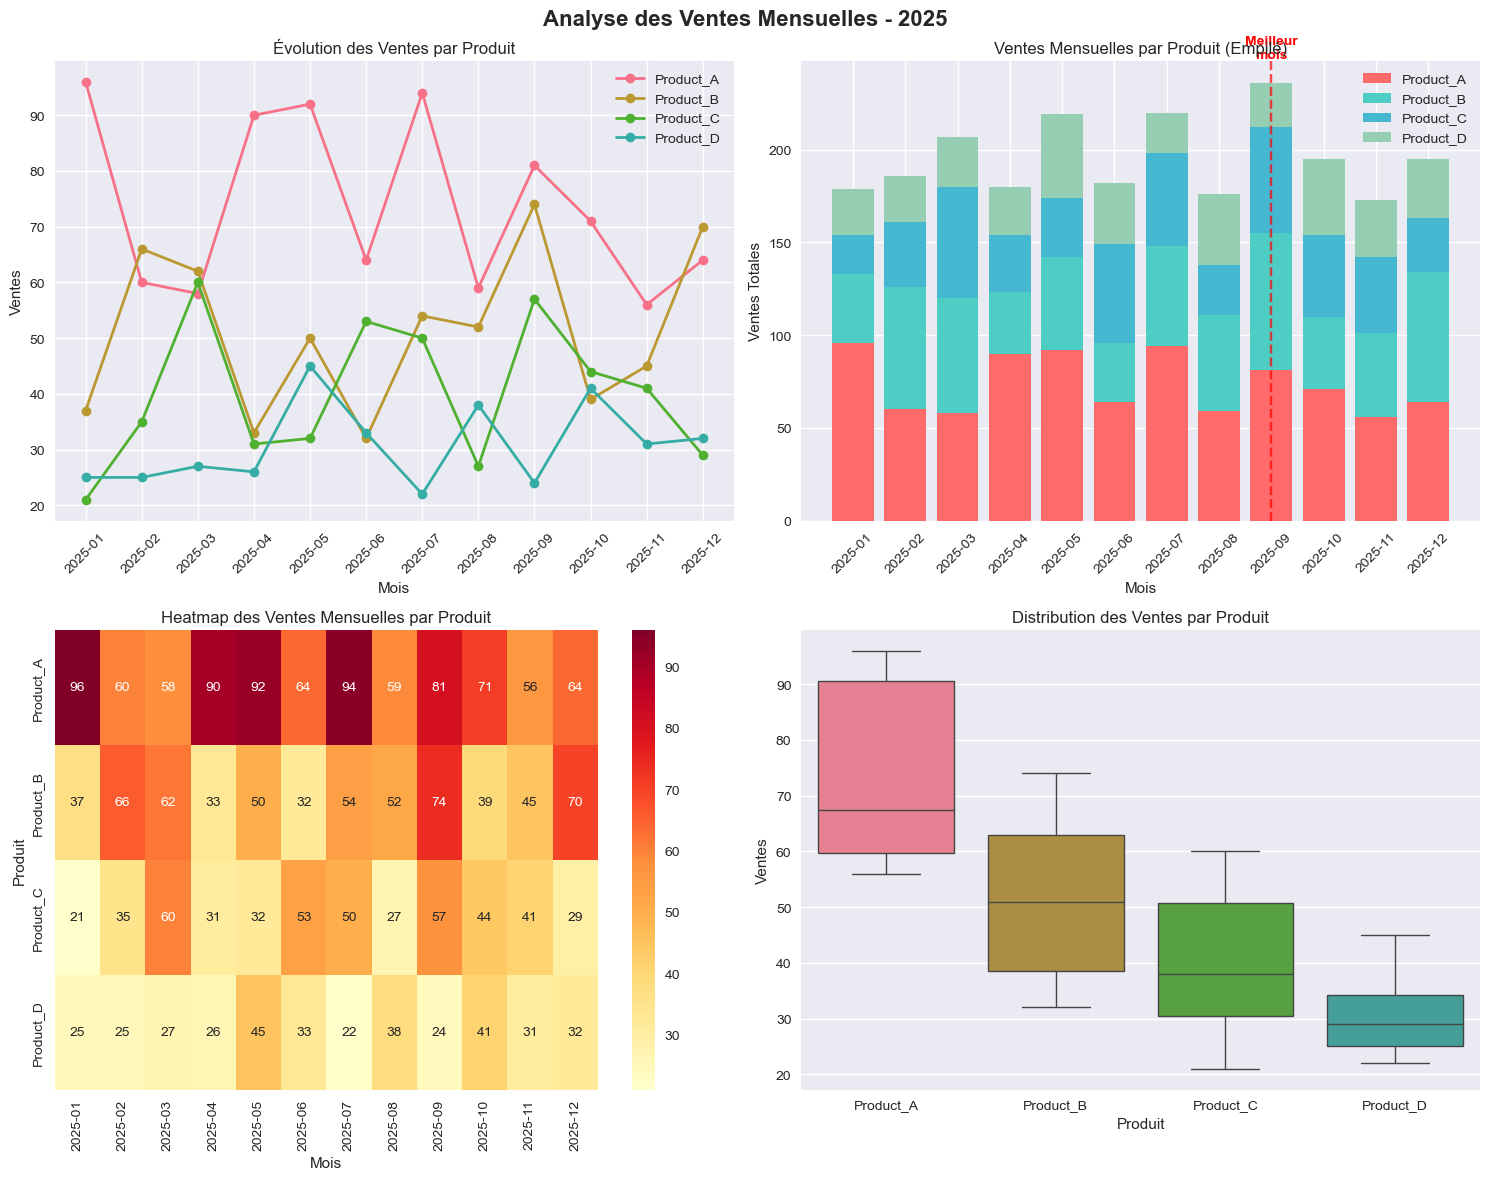

In [21]:

# ## 5. Visualisations

# Configuration des graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analyse des Ventes Mensuelles - 2025', fontsize=16, fontweight='bold')

# Graphique 1: Ligne pour chaque produit
months = df_final['Month']
for product in product_columns:
    axes[0, 0].plot(months, df_final[product], marker='o', label=product, linewidth=2)

axes[0, 0].set_title('Évolution des Ventes par Produit')
axes[0, 0].set_xlabel('Mois')
axes[0, 0].set_ylabel('Ventes')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Graphique 2: Diagramme empilé
bar_width = 0.8
bottom = np.zeros(len(months))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, product in enumerate(product_columns):
    axes[0, 1].bar(months, df_final[product], bar_width, bottom=bottom, label=product, color=colors[i])
    bottom += df_final[product].values

# Annotation du meilleur mois
best_month_idx = df_final['Total_Sales'].idxmax()
axes[0, 1].axvline(x=best_month_idx, color='red', linestyle='--', alpha=0.7)
axes[0, 1].text(best_month_idx, df_final['Total_Sales'].max() * 1.05, 'Meilleur\nmois', 
                ha='center', va='bottom', color='red', fontweight='bold')

axes[0, 1].set_title('Ventes Mensuelles par Produit (Empilé)')
axes[0, 1].set_xlabel('Mois')
axes[0, 1].set_ylabel('Ventes Totales')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Graphique 3: Heatmap
heatmap_data = df_final[product_columns].T
heatmap_data.columns = months
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('Heatmap des Ventes Mensuelles par Produit')
axes[1, 0].set_xlabel('Mois')
axes[1, 0].set_ylabel('Produit')

# Graphique 4: Boxplot
sns.boxplot(data=df_final[product_columns], ax=axes[1, 1])
axes[1, 1].set_title('Distribution des Ventes par Produit')
axes[1, 1].set_xlabel('Produit')
axes[1, 1].set_ylabel('Ventes')

plt.tight_layout()
plt.savefig('data/sales_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# ## 6. Questions de Conclusion

print("RÉPONSES AUX QUESTIONS DE CONCLUSION:\n")

# Question 1: Produit contribuant le plus
contribution = (annual_sales / annual_sales.sum() * 100).round(2)
print(f"1. CONTRIBUTION PAR PRODUIT:")
for product, percent in contribution.items():
    print(f"   {product}: {percent}%")

print(f"\n   → Le {best_product} contribue le plus aux ventes annuelles ({contribution[best_product]}%)")

# Question 2: Meilleur trimestre et analyse
print(f"\n2. PERFORMANCE PAR TRIMESTRE:")
for quarter, sales in quarterly_totals.items():
    print(f"   {quarter}: {sales} ventes totales")

print(f"\n   → Le {best_quarter} est le meilleur trimestre avec {quarterly_totals[best_quarter]} ventes")
print("   Raisons possibles: saisonnalité, promotions, lancements de produits")

# Question 3: Stratégie d'amélioration
print(f"\n3. RECOMMANDATIONS STRATÉGIQUES:")
print("   • Concentrer les efforts sur le produit leader ({})".format(best_product))
print("   • Analyser les facteurs de succès du trimestre {}".format(best_quarter))
print("   • Améliorer les performances des produits moins performants")
print("   • Répliquer les stratégies du meilleur mois sur toute l'année")
print("   • Investir dans la promotion pendant les trimestres faibles")

# Statistiques supplémentaires
print(f"\n📊 STATISTIQUES SUPPLÉMENTAIRES:")
print(f"   Écart-type des ventes: {df_final['Total_Sales'].std():.2f}")
print(f"   Coefficient de variation: {(df_final['Total_Sales'].std() / df_final['Total_Sales'].mean() * 100):.2f}%")
print(f"   Mois avec croissance positive: {sum(df_final['Month_over_Month_Growth'] > 0)}/11")

RÉPONSES AUX QUESTIONS DE CONCLUSION:

1. CONTRIBUTION PAR PRODUIT:
   Product_A: 37.69%
   Product_B: 26.15%
   Product_C: 20.44%
   Product_D: 15.72%

   → Le Product_A contribue le plus aux ventes annuelles (37.69%)

2. PERFORMANCE PAR TRIMESTRE:
   Q1: 572 ventes totales
   Q2: 581 ventes totales
   Q3: 632 ventes totales
   Q4: 563 ventes totales

   → Le Q3 est le meilleur trimestre avec 632 ventes
   Raisons possibles: saisonnalité, promotions, lancements de produits

3. RECOMMANDATIONS STRATÉGIQUES:
   • Concentrer les efforts sur le produit leader (Product_A)
   • Analyser les facteurs de succès du trimestre Q3
   • Améliorer les performances des produits moins performants
   • Répliquer les stratégies du meilleur mois sur toute l'année
   • Investir dans la promotion pendant les trimestres faibles

📊 STATISTIQUES SUPPLÉMENTAIRES:
   Écart-type des ventes: 20.44
   Coefficient de variation: 10.45%
   Mois avec croissance positive: 6/11
